# Adult Census Income Data Analysis
By Brandon Cabrera


This analysis is based on the Adult Census Income Data 
https://www.kaggle.com/datasets/uciml/adult-census-income/data


# Importing Required Libraries

Before we start loading the data we need to import important libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns # graphing purpos


# Importing Dataset
All of our data is contained within one dataset so let's load it and save it as a DataFrame

In [2]:
adult_census_data = pd.read_csv('data/adult_census_income.csv') #load the csv file into DataFrame
adult_census_data.head() # Display the first 5 rows of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's get some info about the columns of the dataset including how many non-null values they have and what each respective column's data type is.

In [3]:
adult_census_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Adult Census Income Data Columns
The Adult Census Income data has 15 columns:
1. age: Age of the individual
2. workclass: Type of employment
3. fnlwgt: Indicates how many people the observation represents from the U.S. population
4. education: Highest level of education the indvidual completed
5. education.num: Numerical representation of education level
6. marital.status: Marital status of the individual
7. occupation: Occupation the individual holds
8. relationship: Relationship within the household
9. race: Race of the individual
10. sex: Biological sex
11. capital.gain: money earned from investments
12. capital.loss: money lost from investments
13. hours.per.week: Average number of hours worked per week
14. native.country: Country of origin
15. income: Indicates whether individual's income is > 50k or <= 50k


# Analysis Questions
Now that we know the columns found in the dataset we can come up with a few questions to motivate our exploration of the dataset.
1. What was the average number of hours worked for a person who
made over 50k, and what was the average number of hours worked
for a person who made less than or equal to 50k?
2. For a person whose highest education level is only high school, who
makes over 50k, if any, what is the average number of hours worked?
3. What is the average education level for a person making over 50k,
and what is the average education level for a person making <= 50k?
4. What is the correlation between capital gain and whether or not a
person makes over 50k?
5. What marital status has the most people making over 50k, and what
marital status has the most people making less than or equal to 50k?
6. What numerical column has the highest amount of correlation, in
terms of magnitude, with where a person made over 50k or less than
or equal to 50k?
7. What workclass has the most people making <= 50k, and what work
class has the most people making >50k?
8. Do women or men tend to make > 50k more than the other, and do
women or men tend to make <= 50k
9. What is the average age of men who make over 50k, and what is the
average age of women who make over 50k
10. Which race tends to make > 50k, more than the other races, and
what race tends to make <= 50k more than the other races


# Cleaning Dataset

Before we start exploring the dataset more in detail we want to make sure our dataset is clean so let's check to see if there is any null values.

In [ ]:
print(adult_census_data.isnull().sum()) # creates a boolean mask of the DataFrame then sum up the amount of True values(null values)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
e

It appears there isn't an null values at first glace. However the dataset does contain '?' in some columns , e.g. row 0 of the workclass column contains a '?'. A question mark is a bit ambigious so for the sake of less ambiguity we will replace the question marks for NaN. So now our data set does have null values which we can decided later on how to deal with them. 

In [5]:
adult_census_data.replace('?', np.nan, inplace=True)
adult_census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's see how many null values we have now after replacing the question mark values.

In [14]:
print(adult_census_data.isnull().sum()) # creates a boolean mask of the DataFrame then sum up the amount of True values(null values)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


Notice that the missing values are only for qualtative features and that all of the numeric features don't have any missing values. This helps us to understand why originally there was '?' values for these columns instead of NaN because it's a qualtative column, NaN isn't the most appropiate placeholder. For a better understanding of how many null values we have let's look at the percentage of null values there is.

In [18]:
print(((adult_census_data.isnull().sum() / len(adult_census_data)) * 100).round(2)) # divide null values by total number of values in column and round to two decimals

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64


The highest percentages is seen 'occupation' feature meaning 5.66 % of the values in the feature are null values. The percentage isn't that high so we can get rid of the rows with null values without worrying about losing too much data.

In [ ]:
adult_census_data.dropna(inplace = True)
print(adult_census_data.count())

age               30162
workclass         30162
fnlwgt            30162
education         30162
education.num     30162
marital.status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital.gain      30162
capital.loss      30162
hours.per.week    30162
native.country    30162
income            30162
dtype: int64


Now that we got rid of our null values we can finally start to explore that dataset in more detail. s

In [1]:
corr_matrix = adult_census_data.corr(numeric_only = True)
corr_matrix

NameError: name 'adult_census_data' is not defined

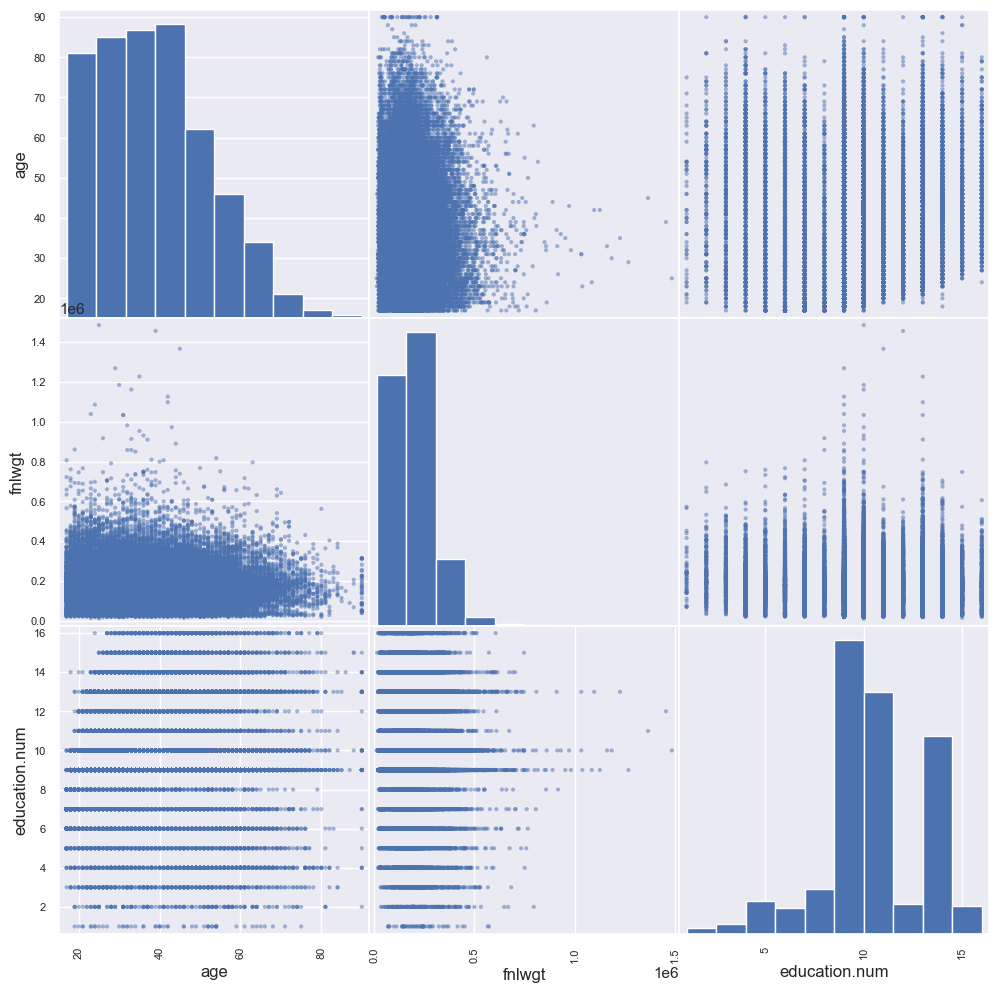

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(adult_census_data.iloc[:,:7], figsize=(12,12))
plt.show()

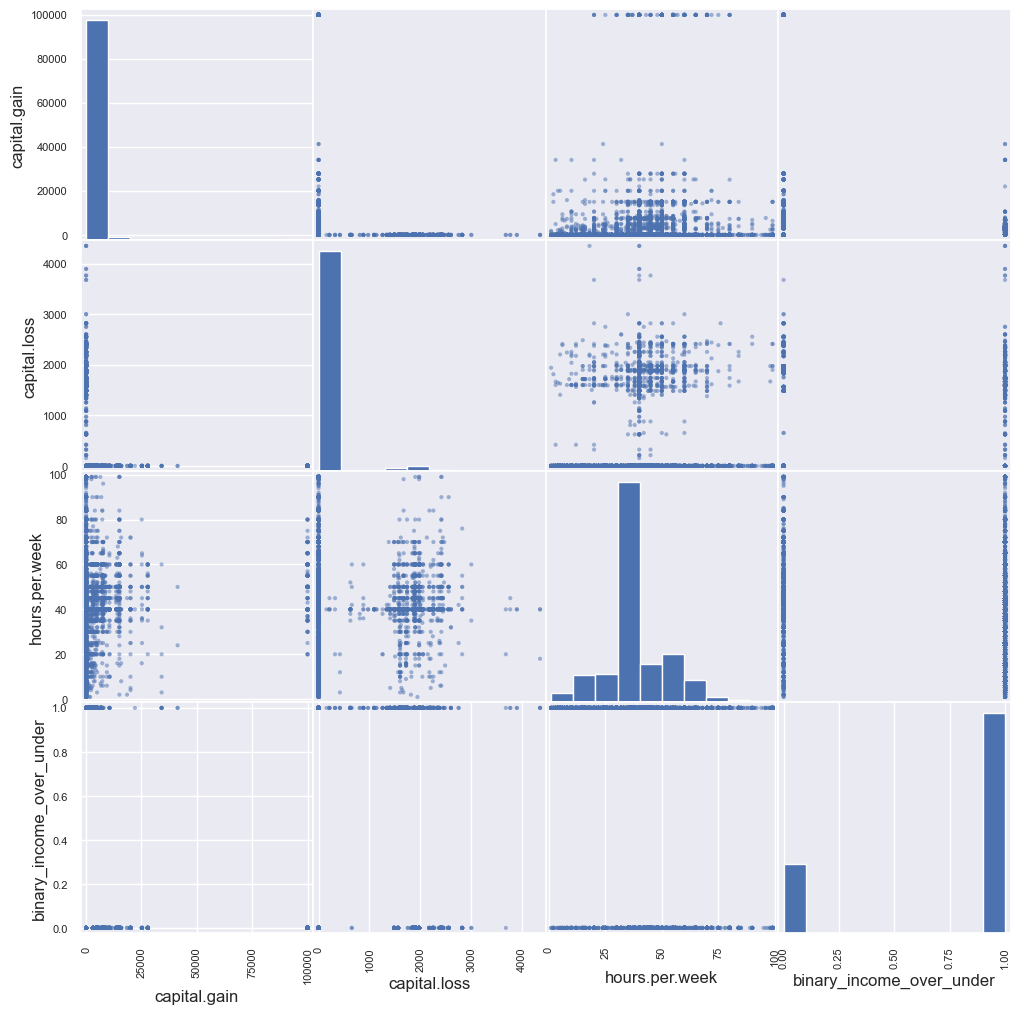

In [ ]:
scatter_matrix(adult_census_data.iloc[:,7:], figsize=(12,12))
plt.show()


In [22]:
adult_census_data['binary_income_over_under'] = (adult_census_data['income'] == '<=50K').astype(int) # 1 for over 50k and 0 for <= 50k

In [23]:
adult_census_data.corr(numeric_only = True)['binary_income_over_under'].sort_values(ascending = False)

binary_income_over_under    1.000000
fnlwgt                      0.008957
capital.loss               -0.150053
capital.gain               -0.221196
hours.per.week             -0.229480
age                        -0.241998
education.num              -0.335286
Name: binary_income_over_under, dtype: float64

# Exploratory Data Analysis(EDA)

# Testing Hypothesis